# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring

## Detecting Heart Disease
The aim of the project is to build a machine learning model to detect heart disease based on different explanatory variables describing certain aspects of an individual's vitals.

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives every year. 4 out of 5 CVD deaths are due to heart attacks and strokes. One-third of these deaths occur prematurely in people under 70 years of age.

### Why is this important?
- Early detection of heart disease helps prevent future complications.
- It also helps those with modifiable risk factors which are reversible.

### What is the objective of the machine learning model?
We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the:
1. F1 Score
2. Model Accuracy

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('heart.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The heart disease dataset contains 918 rows and 12 columns - 11 predictive variables and 1 target column.

Analysis

**We will analyse the following**:
1. The target variable

2. Variable types (categorical and numerical)

3. Missing data.

4. Numerical variables - discrete, continuous, distributions, etc...

5. Categorical variables - cardinality, rare labels.

## Target

Let's begin by exploring the target distribution.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

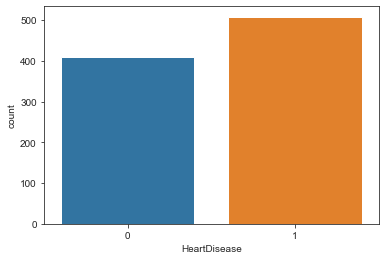

In [3]:
# countplot to evaluate the target
sns.countplot(x='HeartDisease',data=data)

In [4]:
class_0 = data[data.HeartDisease==0]
class_1 = data[data.HeartDisease==1]

print(f'People with heart disease: {len(class_1)}')
print(f'People without heart disease: {len(class_0)}')
print()

print(f'% with heart disease: {len(class_1) / len(data)}')
print(f'% without heart disease: {len(class_0) / len(data)}')
print()

print(f'Ratio of sufferers to non-sufferers: {len(class_1) / len(class_0)}')

People with heart disease: 508
People without heart disease: 410

% with heart disease: 0.5533769063180828
% without heart disease: 0.4466230936819172

Ratio of sufferers to non-sufferers: 1.2390243902439024


The target seems fairly balanced. We even have more instances of the positive class, i.e., the label we are interested in predicting. Typically, the positive class is undersampled leaving us with the task of oversampling the minority or undersampling the majority class to establish parity.

## Variable Types

Let's identify the categorical and numerical variables.

In [5]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# number of categorical variables
print(f'Number of categorical variables: {len(cat_vars)}')

Number of categorical variables: 5


In [6]:
# print out the categorical variables
cat_vars

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [7]:
# now let's identify the numerical variables
num_vars = [var for var in data.columns if var not in cat_vars and var != 'HeartDisease']

# number of numerical variables
print(f'Number of categorical variables: {len(num_vars)}')

Number of categorical variables: 6


In [8]:
# print out the numerical variables
num_vars

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

## Missing Values

Let's go ahead and find out which variables of the dataset contain missing values.

In [9]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

We do not have any null values in the dataset. However, missing values is sometimes recorded with special string values. We can loop through all the variables to find any string values that might suggest some data is missing.

In [10]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 40

There isn't any value in any of the variables that suggests data is missing so we conclude our dataset has no missing values.

# Numerical Variables

Let's go ahead and find out what numerical variables we have in the dataset.

In [11]:
print(f'Number of numerical variables: {len(num_vars)}')

Number of numerical variables: 6


In [12]:
# visualise the numerical variables
data[num_vars].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


## Discrete Variables
Let's find out which variables are discrete, i.e. show a finite number of values.

In [13]:
# make a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]

print(f'Number of discrete variables: {len(discrete_vars)}')

Number of discrete variables: 1


In [14]:
# visualise the discrete variable
data[discrete_vars].head()

,FastingBS
0,0
1,0
2,0
3,0
4,0


In [15]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

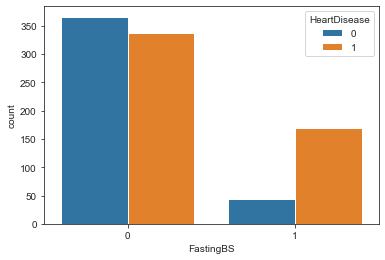

In [16]:
# plot the distribution of the discrete variable
sns.countplot(x='FastingBS', hue='HeartDisease', data=data)

Both classes of people in the variable have a high rate of sufferers but there are more sufferers than non-sufferers in the 1 class even though the 1 class is a small fraction of FastingBS. Any statistically significant difference between both groups would have to be determined by an hypothesis test and effect size computation. We might also include this as a binary variable considering its nature.

## Continuous Variables

Let's go ahead and find the distribution of the continuous variables. We consider continuous variables to be those that are not discrete.

In [17]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]
print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 5


In [18]:
# visualise the continuous variables
data[cont_vars].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


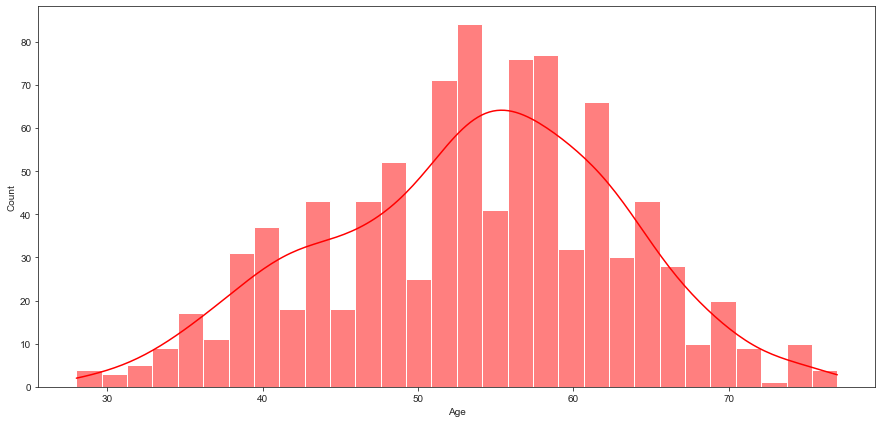

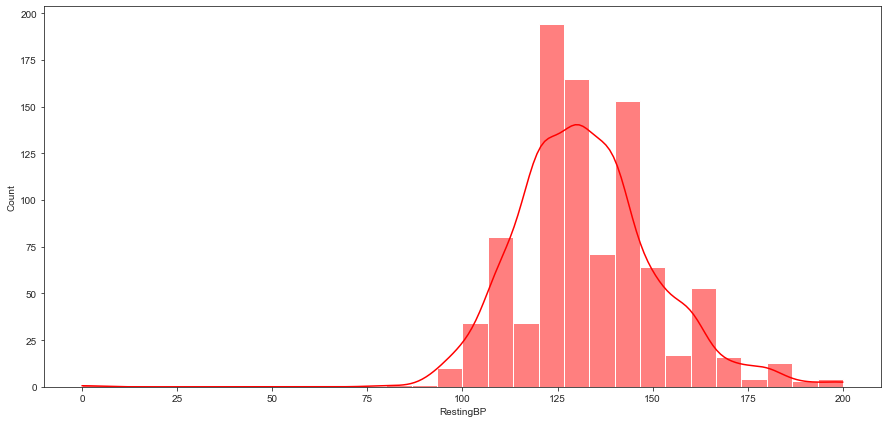

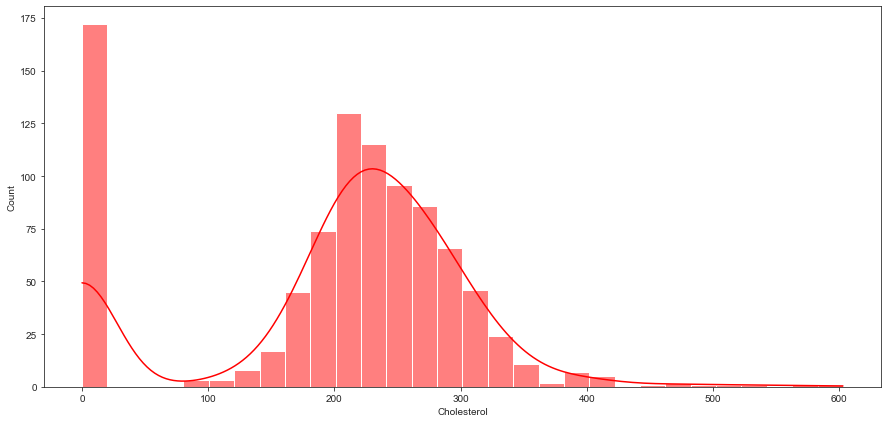

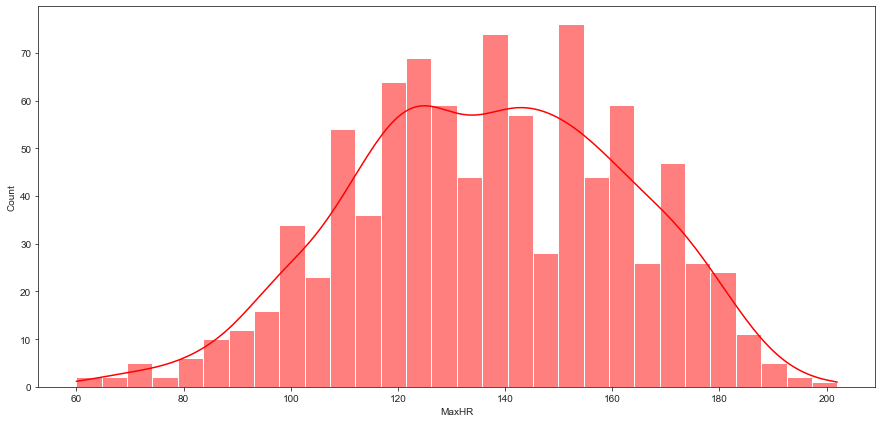

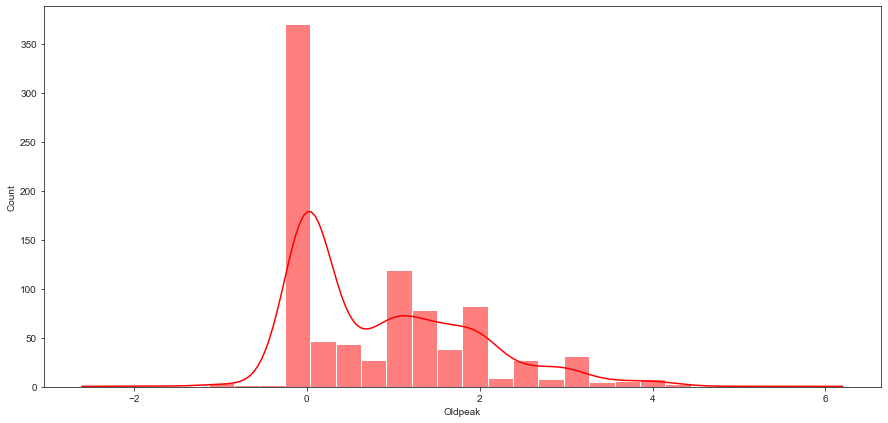

In [19]:
# lets plot histograms for all continuous variables

for var in cont_vars:
    plt.figure(figsize=(15,7))
    sns.histplot(x=var, data=data, color='red', kde=True, alpha=0.5, bins=30)

Three variables have considerable outliers - RestingBP, Cholesterol and Oldpeak. This might complicate model training as the model might not be as familiar with those values. 

Some of these values might actually be important for the model - high levels of cholesterol are typically associated with heart disease. We need to be model to be as familiar with the highest cholesterol levels as possible to make accuarte predictions. This would possibly require resampling and continuous model re-training.

Some of the outliers do not also seem plausible. 0 levels of cholesterol and RestingBP are definitely not realistic. These figures would still need to be confirmed with domain expertise.

We can now adjust Cholesterol and RestingBP by excluding the samples with 0 values.

In [20]:
data = data[data['Cholesterol']!=0]
data = data[data['RestingBP']!=0]

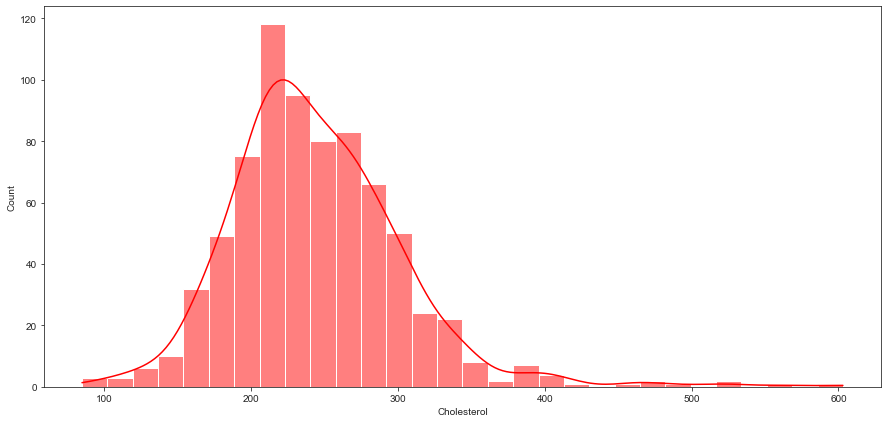

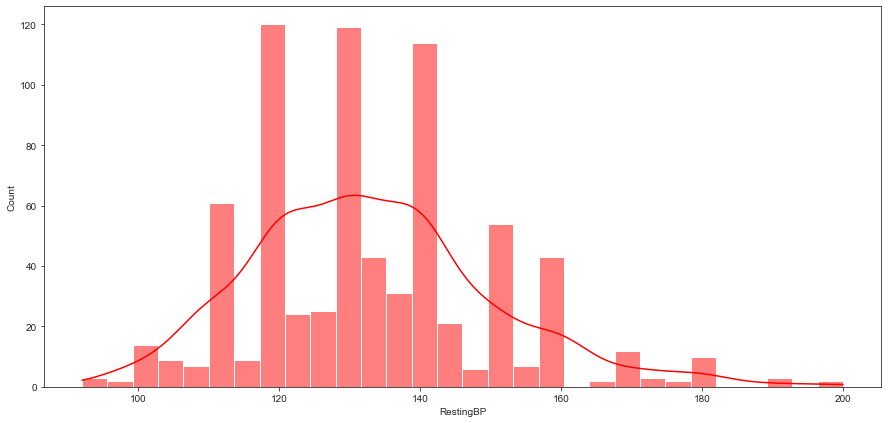

In [21]:
for var in ['Cholesterol','RestingBP']:
    plt.figure(figsize=(15,7))
    sns.histplot(x=var, data=data, color='red', kde=True, alpha=0.5, bins=30)

Notice the spikes at certain points in the distribution. They seem to occur between 100 and 160 at intervals of 10. Just like other observations, we will require domain expertise to explain this.

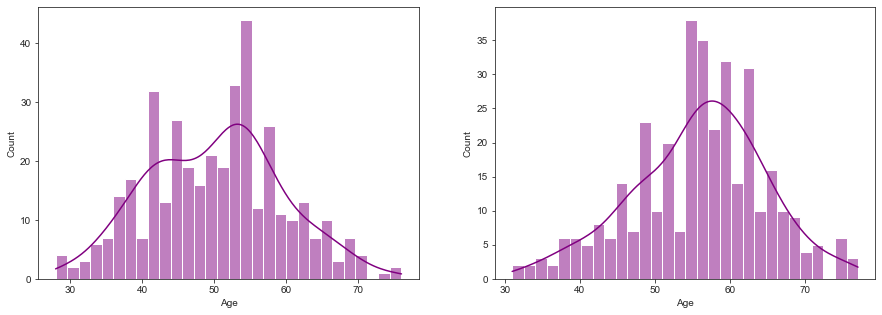

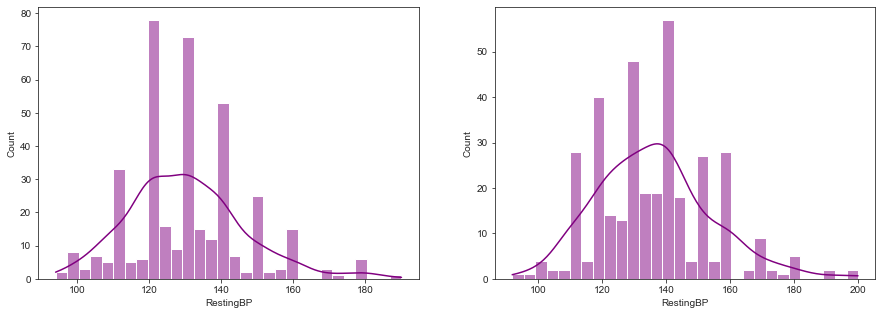

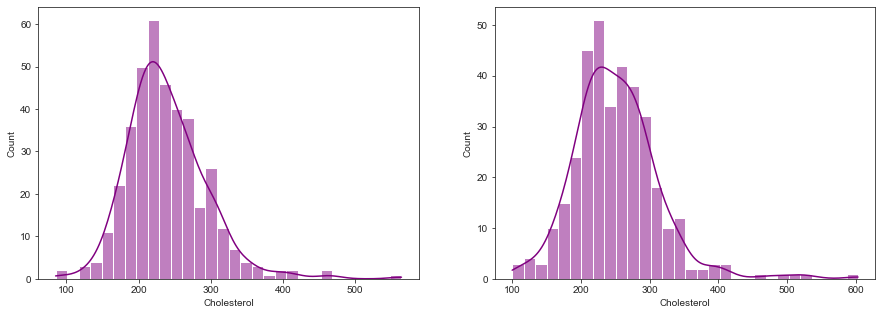

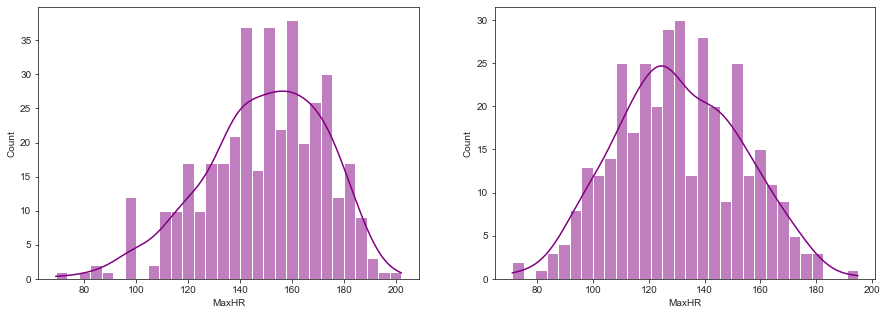

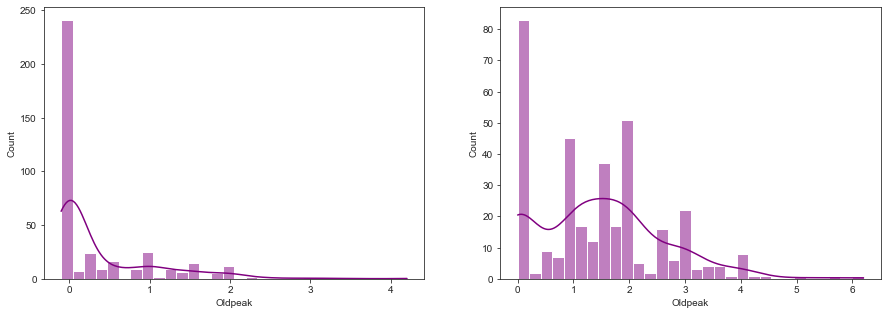

In [22]:
# hsitogram plots for the two target labels

for var in cont_vars:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.histplot(x=var, data=data[data['HeartDisease']==0], alpha=0.5, bins=30, color='purple', kde=True)
    
    plt.subplot(1,2,2)
    sns.histplot(x=var, data=data[data['HeartDisease']==1], alpha=0.5, bins=30, color='purple', kde=True)

Hypothesis testing would be preferred in determining any statistical difference between both groups considering how hard it is to tell with a simple eye-test.

# Categorical Variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [23]:
print(f'Number of categorical variables: {len(cat_vars)}')

Number of categorical variables: 5


In [24]:
# visualise the values of the categorical variables
data[cat_vars].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

<AxesSubplot:>

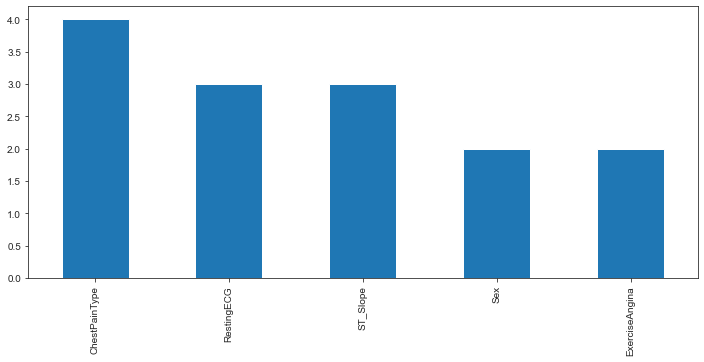

In [25]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

All the categorical variables show low cardinality, i.e. they have only a few different labels. This is good as we won't need to tackle cardinality during feature engineering.

Categorical variables are either binary or non-binary. We will separate our categorical variables into these two groups.

## Binary Variables

In [26]:
# grab all the varaibles with only 2 unique values
binary = [var for var in cat_vars if data[var].nunique() == 2]
binary

['Sex', 'ExerciseAngina']

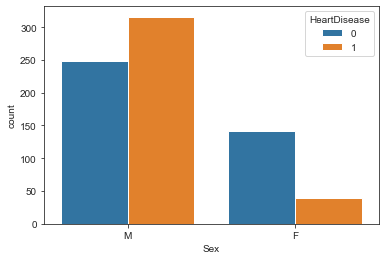

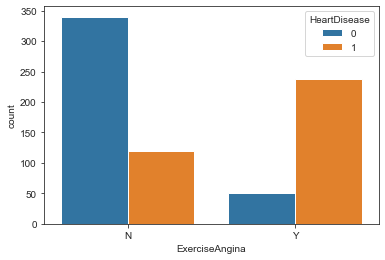

In [27]:
# plot out the binary variables
for var in binary:
    sns.countplot(x=var,hue='HeartDisease',data=data)
    plt.show()

We have more males than females in the dataset and heart disease in more prevalent with men. There are more men with heart disease than men without it. Heart disease is also not common with women.

Notice the high rate of disease with people who have exercise angina. For a risk factor, ExerciseAngina should also have a lot more samples to train the model on.

In [28]:
# reminder: add discrete_vars to binary 
# FastingBS has only 2 labels
binary = binary + discrete_vars
binary

['Sex', 'ExerciseAngina', 'FastingBS']

## Non-binary Variables

In [29]:
non_binary = [var for var in cat_vars if data[var].nunique() > 2]
non_binary

['ChestPainType', 'RestingECG', 'ST_Slope']

In [30]:
for var in non_binary:
    print(f'{var}: {data[var].unique()}')

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ST_Slope: ['Up' 'Flat' 'Down']


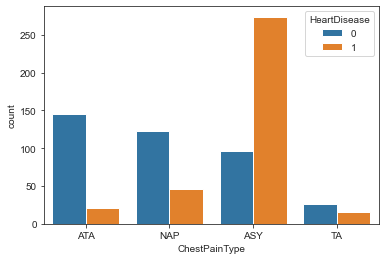

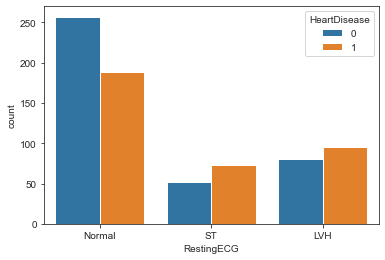

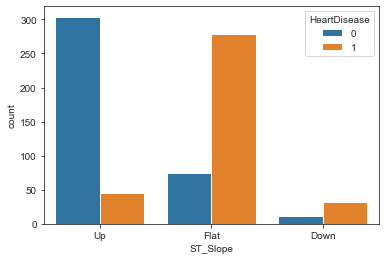

In [31]:
for var in non_binary:
    sns.countplot(x=var,hue='HeartDisease',data=data)
    plt.show()

We notice higher disease rates for certain labels: 
- ChestPainType: TA
- RestingECG: ST and LVH. These lables are undersized compared to the Normal label.
- ST_Slope: Down.

## Rare Labels

Let's go ahead and investigate if there are labels present only in a small number of houses:

In [32]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    tmp = df.groupby(var)['HeartDisease'].count() / len(df)
    
    return tmp[tmp < rare_perc]

In [33]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: HeartDisease, dtype: float64)

Series([], Name: HeartDisease, dtype: float64)

Series([], Name: HeartDisease, dtype: float64)

Series([], Name: HeartDisease, dtype: float64)

Series([], Name: HeartDisease, dtype: float64)



We might not have a lot of labels that meet the definition of rare (1%) but there are some labels that could definitely benefit from more sampling for us to train an efficient and accurate model.